## Análise das Transações

<img src="transacoes.avif">

O BanVic até o momento já registrou 71.921 transações! Nessa análise, vamos entender mais sobre elas.

In [1]:
# Importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,5]
# Tamanho dos dados
plt.rcParams["font.size"] = 12

# Lendo a guia 'transacoes' da planilha 'projeto3.xlsx'
df_transacoes = pd.read_excel("base_excel.xlsx", sheet_name = "transacoes")

In [2]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71921 entries, 0 to 71920
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cod_transacao      71921 non-null  int64         
 1   num_conta          71921 non-null  int64         
 2   data_transacao     71921 non-null  datetime64[ns]
 3   horario_transacao  71921 non-null  object        
 4   nome_transacao     71921 non-null  object        
 5   valor_transacao    71921 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.3+ MB


In [3]:
df_transacoes.head()

,cod_transacao,num_conta,data_transacao,horario_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22,03:15:21,Saque,-130.0
1,28405,256,2021-06-29,11:52:38,Saque,-255.0
2,1776,512,2020-05-17,13:04:50,Saque,-250.0
3,14311,512,2020-09-06,02:55:34,Saque,-80.0
4,25012,512,2020-10-16,09:26:52,Saque,-475.0


Na tabela acima, temos uma visão das primeiras 5 linhas dos nosso dados referentes as transações. 

In [4]:
df_transacoes.groupby('nome_transacao')['valor_transacao'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_transacao,,,,,,,,
Compra Crédito,24940.0,-53.139415,59.021306,-1405.02,-64.900,-35.270,-19.1500,-0.80
Compra Débito,17644.0,-53.327265,60.805422,-1799.62,-65.580,-35.380,-19.2400,-0.77
DOC - Realizado,91.0,-25565.824176,17971.684770,-96540.00,-34370.000,-21590.000,-13245.0000,-3210.00
DOC - Recebido,402.0,34204.415423,37192.525797,1260.00,11136.250,21172.500,44420.0000,333355.00
Depósito em espécie,4852.0,90.673986,140.096207,1.87,25.045,48.545,96.8175,2318.70
Estorno de Debito,403.0,62.518412,65.824654,1.78,24.325,42.440,74.4450,583.73
Pagamento de boleto,450.0,-1142.256889,1147.481360,-7622.00,-1492.600,-723.500,-416.7000,-44.20
Pix - Realizado,13164.0,-513.283614,568.352641,-12183.30,-632.725,-341.000,-184.9500,-12.60
Pix - Recebido,5134.0,596.822789,620.325396,22.00,216.925,404.350,753.9250,9124.10


Observamos acima a variável 'valor_transacao' agrupada pelas diferentes categorias de transações.

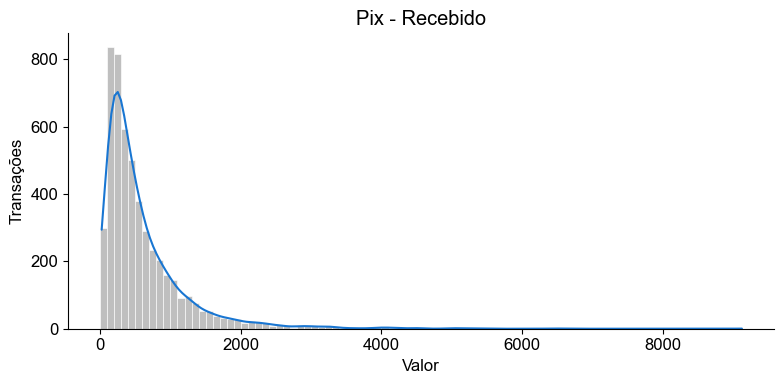

In [5]:
# Criando uma variável para auxiliar
nome_transacao = df_transacoes['nome_transacao'].unique()

# Define o estilo e o tamanho do gráfico
fig, ax = plt.subplots(figsize = (8,4))
sns.set_style("whitegrid", {'axes.grid' : False})
cor_histograma = "gray"

# Cria o histograma
sns.histplot(df_transacoes['valor_transacao'].loc[df_transacoes['nome_transacao'] == nome_transacao[4]], kde=True, bins=range(0, 9200, 100), color= cor_histograma)

# Adiciona título e rótulos
ax.set_title(nome_transacao[4])
ax.lines[0].set_color('#1976D2')
ax.set_xlabel("Valor", fontsize=12)
ax.set_ylabel("Transações", fontsize=12)
ax.grid(False)

# Remove a borda superior e direita para limpeza
sns.despine()

plt.tight_layout()

Podemos ver que a maioria das transações possuem um valor de Pix - Recebido até 1000,00 reais, aproximadamente.

Observando o histograma acima e pela curvatura da linha azul podemos entender que é uma distribuição com assimetria positiva ou à direita, isto é, que a maioria dos valores são menores e que existem poucos valores grandes.

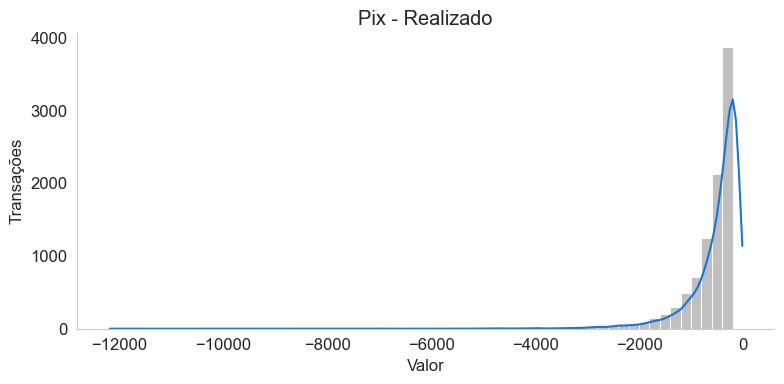

In [6]:
# Define o estilo e o tamanho do gráfico
fig, ax = plt.subplots(figsize = (8,4))
sns.set_style("whitegrid", {'axes.grid' : False})
cor_histograma = "gray"

# Cria o histograma
sns.histplot(df_transacoes['valor_transacao'].loc[df_transacoes['nome_transacao'] == nome_transacao[8]], kde=True, bins=range(-12200, 0, 200), color= cor_histograma)

# Adiciona título e rótulos
ax.set_title(nome_transacao[8])
ax.lines[0].set_color('#1976D2')
ax.set_xlabel("Valor", fontsize=12)
ax.set_ylabel("Transações", fontsize=12)

# Remove a borda superior e direita para limpeza
sns.despine()

plt.tight_layout()

Podemos ver que a maioria das transações possuem um valor de Pix - Realizado até 1000,00 reais, aproximadamente.

Por ser um gráfico com valores negativos, parece ser o oposto do gráfico anterior, mas na verdade sua distribuição e características são bem parecidas, o que muda mesmo é a direção do eixo.

<Axes: xlabel='valor_transacao', ylabel='nome_transacao'>

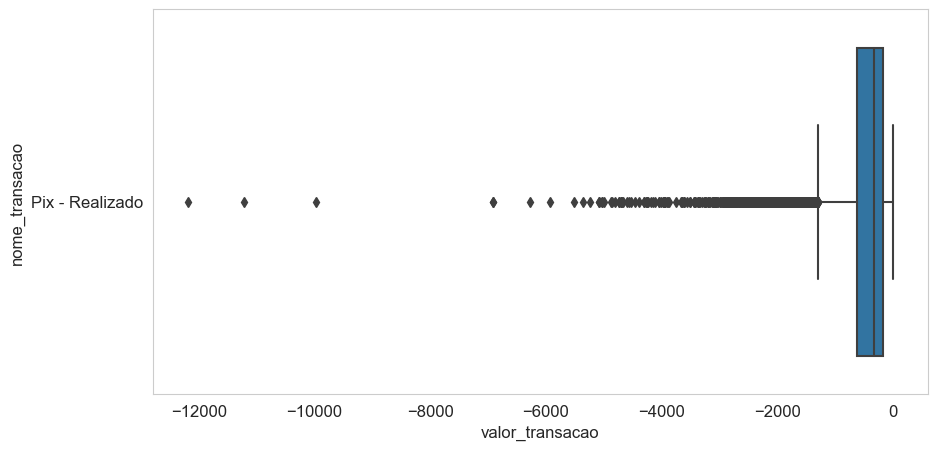

In [7]:
sns.boxplot(data=df_transacoes.loc[df_transacoes['nome_transacao'] == nome_transacao[8]], x="valor_transacao",  y="nome_transacao")

Inseri esse gráfico boxplot só pra exemplificar mesmo, não diz muito de diferente do histograma. 

Concentração maior próxima ao valor 0 e podemo ver que existem muitos outliers.

#### Conclusão

* Apesar de ter PIX com valores altos, a grande maioria é feita para valores mais baixos.